## Comparação com experiência ($N=3$)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Observações ###

In [3]:
tl,xall,xbll,xcll = np.loadtxt(
    "/home/ljma/MEOCloud/fis/2024/fslinky/lab_data/video_data/20231128_DSC_1763_N3_v3.txt",
    unpack=True)

In [4]:
pxal = np.polyfit(tl, xall, 9)
pxbl = np.polyfit(tl, xbll, 9)
pxcl = np.polyfit(tl, xcll, 9)
xal = lambda t: np.polyval(pxal, t)
xbl = lambda t: np.polyval(pxbl, t)
xcl = lambda t: np.polyval(pxcl, t)

### Soluções numéricas ###

In [5]:
def rhs2(t, y, k, m, g, N):
    x, v = np.split(y, 2)
    xdot = v
    vdot = np.zeros_like(v)
    vdot[0] = -N*g + k/m * (x[1] - x[0])
    vdot[1:-1] = k/m * (x[2:] - 2*x[1:-1] + x[:-2])
    vdot[-1] = k/m * (x[-2] - x[-1])
    return np.hstack((xdot, vdot))

In [6]:
N = 3
KK = 0.4399
k = KK * (N - 1)
L0 = 0.4639
l0 = L0 / (N - 1)
g = 9.81
m = 56.6E-3

In [7]:
i = np.arange(N)
x0 = np.zeros(N)
v0 = np.zeros(N)
y0 = np.hstack((x0, v0))
soluc = solve_ivp(rhs2, [0, 0.4], y0, args=[k, m, g, N], max_step=0.01)
tn = soluc.t
xn, vn = (np.vsplit(soluc.y, 2))
pxan = np.polyfit(tn,xn[0],6)
pxbn = np.polyfit(tn,xn[1],6)
pxcn = np.polyfit(tn,xn[2],6)
xan = lambda t: np.polyval(pxan, t)
xbn = lambda t: np.polyval(pxbn, t)
xcn = lambda t: np.polyval(pxcn, t)

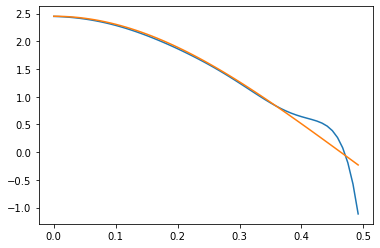

In [8]:
plt.plot(tl, xal(tl+0.05), tl, xal(tl[0])+xan(tl));

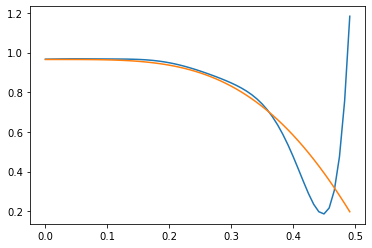

In [9]:
plt.plot(tl, xbl(tl+0.05), tl, xbl(tl[0])+xbn(tl));

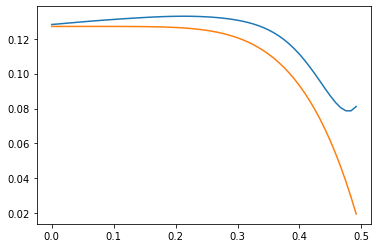

In [10]:
plt.plot(tl, xcl(tl+0.05), tl, xcl(tl[0])+xcn(tl));

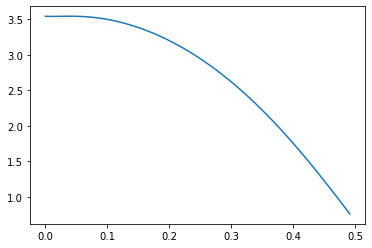

In [13]:
plt.plot(tl,xal(tl)+xbl(tl)+xcl(tl));

In [18]:
xcm = np.polyfit(tl,(xall+xbll+xcll)/3, 2)

In [19]:
xcm

array([-4.59576019,  0.36773531,  1.17618499])